# Trabalho de Deep Learning - FIAP - Professor Felipe Teodoro

## Alunos

RM 340544 - Mauricio Raghe Binda <br>
RM 341704 - Ricardo da Silva Cruz <br>
RM 340347 - Rodrigo de Miranda Videira  <br>

___

## Exercício 5

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


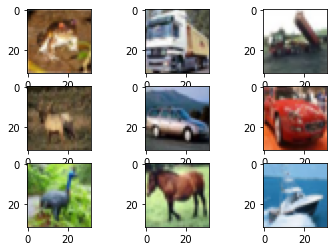

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 28)        3052      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 28)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 28)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 10)        28010     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 10)         0         
 2D)                                                             
                       

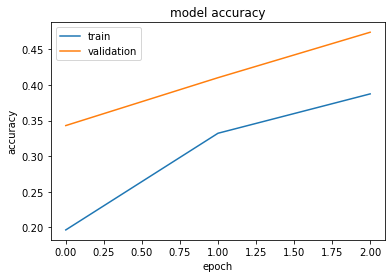


 Test accuracy: 0.46149998903274536
313/313 [==============================] - 6s 18ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 28)        3052      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 28)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 28)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 10)        28010     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 10)         0         
 2D)                                                             
                           

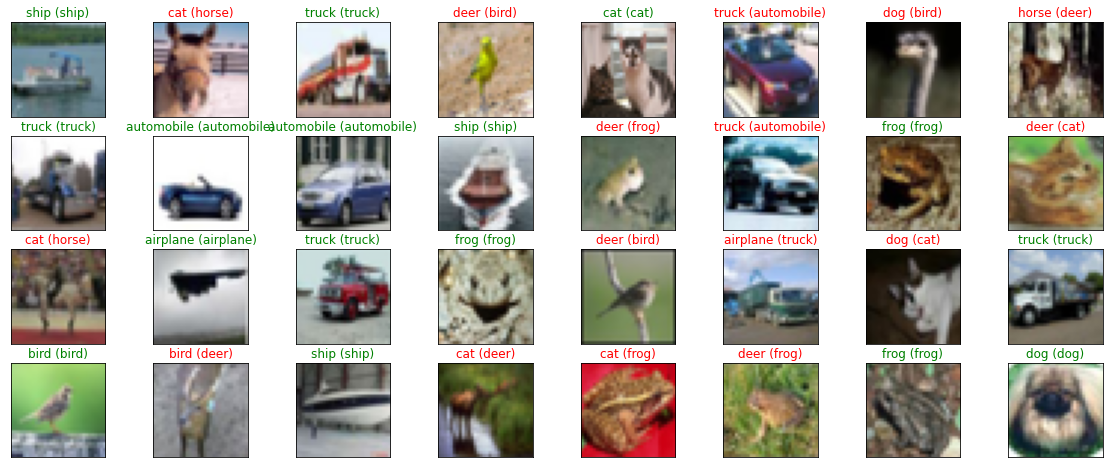

In [3]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.utils import np_utils
from keras.utils import plot_model
import tensorflow as tf



#print(tf.compat.v2.test.is_gpu_available)
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#carregando o dataset pré-embaralhado de treinamento bem como os dados de teste
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()


# ### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


# ### 4.  Dividindo o dataset em treinamento, teste e validação

# "one-hot encode" aplicado aos rótulos
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# impressão da forma do conjunto de treino
print('x_train shape:', x_train.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


# ### 5. Definindo a arquitetura do modelo (IMPORTANTE!)
# 
# * 2 camadas convolucionais de tamanho progressivamente crescente
# * Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
# * Uma camada do tipo totalmente conectada de 120 neurônios
# * Uma camada do tipo totalmente conectada de 84 neurônios
# * Últimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
# * "Dropout" de 0,2-0,3



model = Sequential()
#input_shape sem o parametro data_format='channels_first'
model.add(Conv2D(filters=28, kernel_size=6, padding='same', activation='relu', input_shape=(32, 32, 3)))                        
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=10, kernel_size=10, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/

model.summary()


# ### 6. Compilando o modelo

# compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
# mais informações em https://keras.io/losses/
# mais informações em https://keras.io/optimizers/
# mais informações em https://keras.io/metrics/

#opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                  


# ### 7. Treinando o modelo
from keras.callbacks import ModelCheckpoint   

#O keras passa a salvar o melhor modelo pela função de perda
checkpointer = ModelCheckpoint(filepath='modelocifar10FIAP.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #
                              
hist = model.fit(x_train, y_train, batch_size=500, epochs=3, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

# ### 8. Carregando o modelo com a melhor precisão de validação
# carregando os pesos que geraram a melhor precisão de validação
#model.load_weights('modelocifar10FIAP.hdf5')

#model = load_model('modelocifar10FIAP.hdf5')

plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# ### 9. Cálculo da precisão de classificação no dataset de testes

# avaliar e imprimir a precisão do teste
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


# ### 10. Visualizar algumas predições
# 
# As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
# obtendo previsões no conjunto de testes
y_hat = model.predict(x_test)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
print(model.summary())
plot_model(model, to_file='cnn-CIFAR10.png', show_shapes=True, show_layer_names=True)


